#Amazon Book Review EDA

##Import Library

In [1]:
import re
import pandas as pd
# Import the matplotlib library and assign it the alias 'plt'
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


##Load filtered CSV file

In [2]:
book_filtered = pd.read_csv('/content/drive/MyDrive/Capstone_Project_IOD/book_filtered_2020_eoD.csv')

In [3]:
ratings_filtered = pd.read_csv('/content/drive/MyDrive/Capstone_Project_IOD/ratings_filtered_2020_eoD.csv')

##Review of dataset

### Book Dataset

In [4]:
book_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         56 non-null     int64  
 1   book_title         56 non-null     object 
 2   description        53 non-null     object 
 3   book_author        56 non-null     object 
 4   categories         48 non-null     object 
 5   ratings_count      27 non-null     float64
 6   published_date_dt  56 non-null     object 
 7   num_of_review      56 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.6+ KB


In [5]:
book_filtered.describe()

,Unnamed: 0,ratings_count,num_of_review
count,56.000000,27.000000,56.000000
mean,76266.553571,88.629630,488.303571
std,56932.123256,212.916948,436.758137
min,2077.000000,1.000000,205.000000
25%,25412.500000,8.000000,231.000000
50%,66177.000000,27.000000,265.000000
75%,125121.000000,51.000000,553.000000
max,185745.000000,1012.000000,1883.000000


In [6]:
book_filtered.sample(10)

,Unnamed: 0,book_title,description,book_author,categories,ratings_count,published_date_dt,num_of_review
39,106624,The Center of Everything : A Novel,Set against the wild beauty of Montana as a wo...,['Jamie Harrison'],['Fiction'],1.0,2021-01-12,222
8,10905,Children of the Mind,NaN,['Orson Scott Card'],['Fiction'],11.0,2021-08-24,260
43,129383,Philip & Alex's Guide to Web Publishing,______________________________________________...,['Gyles Brandreth'],['Biography & Autobiography'],NaN,2021-04-27,232
20,41737,"Oahu Revealed: The Ultimate Guide to Honolulu,...",The finest guidebook ever written for O'ahu. N...,['Andrew Doughty'],NaN,NaN,2022-07-01,293
0,2077,The Daughter of Time,Voted greatest mystery novel of all time by th...,['Josephine Tey'],NaN,111.0,2021-03-25,486
44,139140,Narrative of the Life of Frederick Douglass: A...,Narrative of the Life of Frederick Douglass Fi...,['FREDERICK DOUGLASS'],['Biography & Autobiography'],51.0,2021-01-01,248
25,56623,"That Was Then, This Is Now",Sixteen-year-olds Mark and Bryon have been lik...,['S. E. Hinton'],['Young Adult Fiction'],27.0,2021-05-04,268
15,27309,Fascinating womanhood,Over 50 years after the original book became a...,['Dixie Andelin Forsyth'],['Family & Relationships'],NaN,2021-02-26,945
10,19171,The Painted Veil,The novel is set in the 1920s in England and H...,['W. Somerset Maugham'],['Fiction'],76.0,2022-07-21,262
22,50996,Fiesta [The Sun Also Rises].,"First published in 1926, ‘The Sun Also Rises’ ...","['Ernest Hemingway', 'Digital Fire']",['Fiction'],1.0,2022-05-15,675


### Book Ratings DataSet

In [7]:
ratings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22502 entries, 0 to 22501
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   22502 non-null  int64  
 1   book_id      22502 non-null  object 
 2   book_title   22502 non-null  object 
 3   book_price   1713 non-null   float64
 4   user_id      22502 non-null  object 
 5   rating       22502 non-null  float64
 6   review       22502 non-null  object 
 7   review_date  22502 non-null  object 
 8   sentiment    22502 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [8]:
ratings_filtered.sample(10)

,Unnamed: 0,book_id,book_title,book_price,user_id,rating,review,review_date,sentiment
8178,761451,B000K0H0OO,Tell No One,NaN,AO51B725172EA,2.0,"The plot goes from intriguing to unbelievable,...",2006-06-19,0
5931,578456,0517154714,Saving Grace,NaN,A1BR80X4UNFNMI,5.0,"I loved watching Johanna grow more confident, ...",2012-11-03,1
12302,1133587,B000NHNM3C,George Orwell 1984,NaN,A2PN62S0L13TD,5.0,One of the most frightening and important book...,2002-10-27,1
5133,573073,0582528259,Jane Eyre (Simple English),NaN,AYPFPI6LDLLU1,5.0,Captivating from the start......pulls you in a...,2011-12-31,1
14879,1526791,B000NWQYKK,It Can't Happen Here,NaN,A3S95ATD0DXUXV,5.0,This book is an amazing timeless look at how e...,2008-11-28,1
3601,445479,0460872702,Great Gatsby (Everyman),NaN,ASG2O5RLWLYHS,3.0,The book started out as a bore. It was just a ...,2004-10-24,1
7181,640491,B00005X4LX,The Warlord of Mars,NaN,A1GTGTYSWB1MVJ,5.0,Warlord of Mars is the third novel in a series...,2012-03-26,1
9854,1048822,B0007C10MS,The great Gatsby (Leading English literature l...,NaN,A2BTTP7LS8OI6X,5.0,The Great Gatsby along with The Sun Also Rises...,2006-02-14,1
13190,1347954,B00087V4DM,"The science of getting rich,",NaN,A1PUN2O2F332YC,5.0,I believe that the Science of Getting Rich by ...,2008-11-08,1
6969,612014,0971727929,"Oahu Revealed: The Ultimate Guide to Honolulu,...",NaN,A24ZTUWJQ5Z7XY,4.0,I purchased this book for a trip I was taking ...,2010-04-05,1


In [9]:
ratings_filtered.describe()


,Unnamed: 0,book_price,rating,sentiment
count,2.250200e+04,1713.000000,22502.000000,22502.000000
mean,1.245468e+06,26.252300,4.235312,0.891876
std,8.238409e+05,27.567314,1.173024,0.310544
min,2.731800e+04,5.600000,1.000000,0.000000
25%,5.737208e+05,7.060000,4.000000,1.000000
50%,1.132252e+06,11.000000,5.000000,1.000000
75%,1.998617e+06,22.950000,5.000000,1.000000
max,2.948489e+06,96.950000,5.000000,1.000000


##Top 10 Book Catogeries

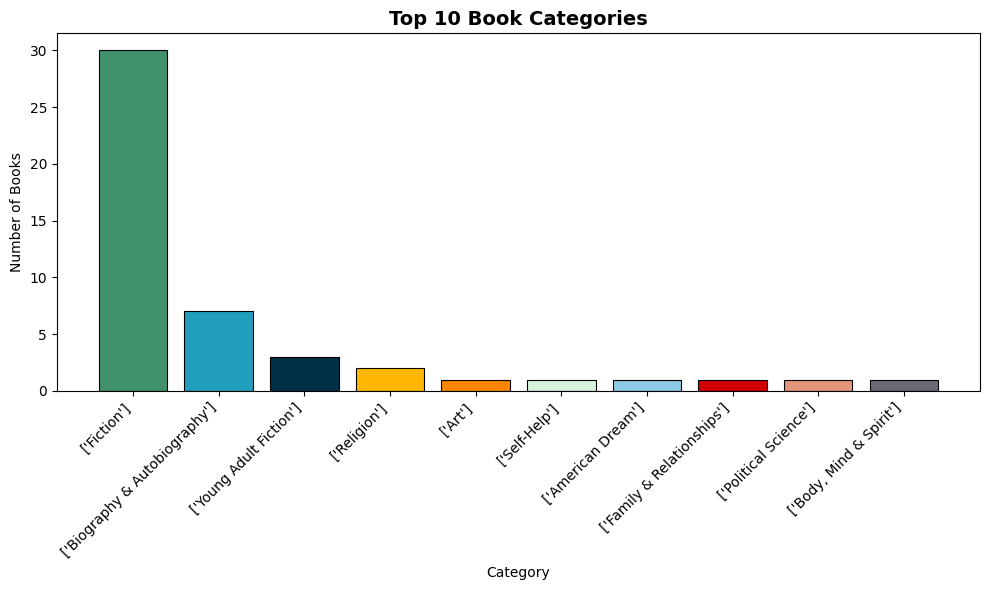

In [10]:
counts = book_filtered['categories'].value_counts().sort_values(ascending=False).head(10)

# a 10-color custom palette
colors = [
    "#40916c", # light sky blue
    "#219ebc",  # strong cyan
    "#023047",  # deep navy
    "#ffb703",  # mustard yellow
    "#fb8500",  # vivid orange
    "#d8f3dc",  # pale mint
    "#8ecae6",  # forest green
    "#d00000",  # bold crimson
    "#e29578",  # muted coral
    "#6d6875"   # slate gray-purple
]

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=colors, edgecolor="black", linewidth=0.8)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.title("Top 10 Book Categories", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Book Review category's sentiment

### Merged Dataframes with join key (book titles)

In [11]:
# 2. Normalize the join key (book titles) to avoid mismatches
def make_key(s):
    return (s.astype(str)
             .str.strip()
             .str.lower()
             .str.replace(r"\s+", " ", regex=True))

book_filtered['title_key']   = make_key(book_filtered['book_title'])
ratings_filtered['title_key'] = make_key(ratings_filtered['book_title'])

# 3. Merge on title_key to bring in categories
merged = ratings_filtered.merge(
    book_filtered[['title_key','categories']],
    on='title_key',
    how='left'
)

# 4. Label sentiment
# if you already have 0/1 in 'sentiment', map them:
merged['sentiment_label'] = merged['sentiment'].map({0:'negative', 1:'positive'})

# 5. Explode multi-category entries
# assume categories are pipe-delimited, e.g. "Fiction|Mystery"
merged['category_list'] = merged['categories'].fillna('').str.split('|')
df = merged.explode('category_list').rename(columns={'category_list':'category'})
df = df.dropna(subset=['category'])

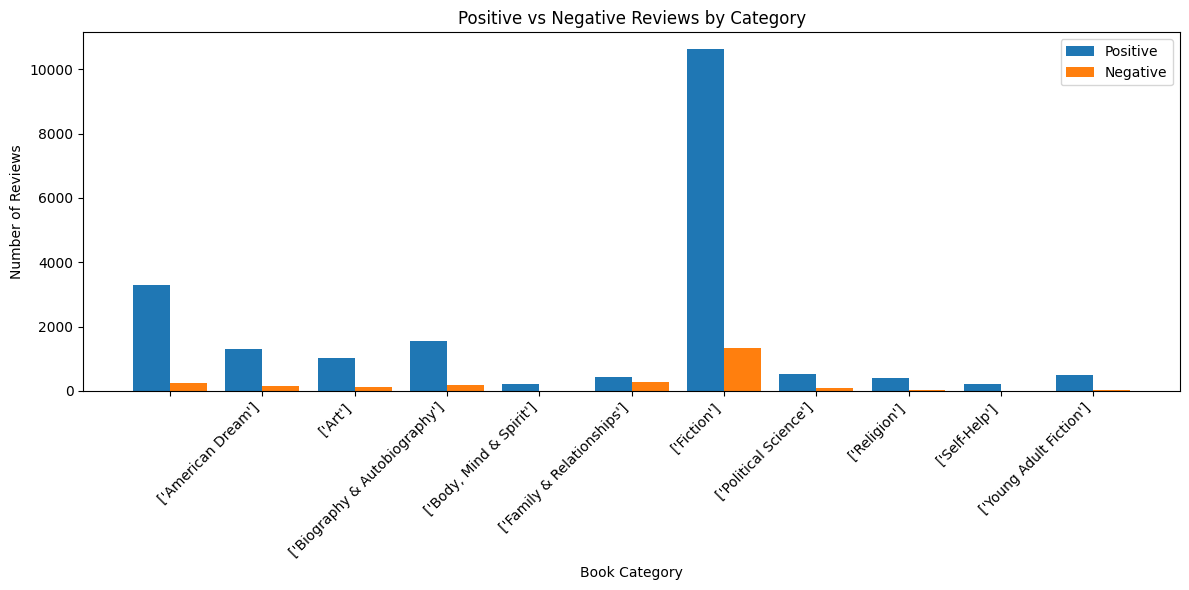

In [12]:
# 6. Build the pivot of counts
counts = (
    df
    .groupby(['category','sentiment_label'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# 7. Plot a grouped‐bar chart
categories = counts.index.tolist()
pos = counts['positive'].values
neg = counts['negative'].values

x = np.arange(len(categories))
width = 0.4

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, pos, width, label='Positive')
ax.bar(x + width/2, neg, width, label='Negative')

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Book Category')
ax.set_title('Positive vs Negative Reviews by Category')
ax.legend()
plt.tight_layout()
plt.show()

### Compare Word Count for negative & positive sentiment

            count        mean  median         std  min     max
Positive  20069.0  161.312123   100.0  184.087787  1.0  3451.0
Negative   2433.0  162.969585   109.0  170.662797  7.0  1377.0


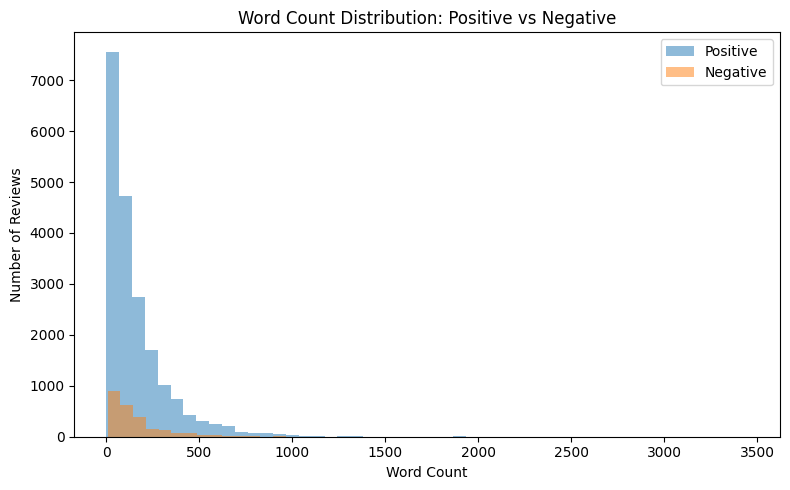

In [13]:
# 1) Compute word count for each review
merged['word_count'] = merged['review'].str.split().str.len()


# 2) Split into positive vs. negative
pos_wc = merged.loc[merged['sentiment']==1, 'word_count']
neg_wc = merged.loc[merged['sentiment']==0, 'word_count']

# 3) Show summary statistics
stats = pd.DataFrame({
    'Positive': pos_wc.describe(),
    'Negative': neg_wc.describe()
}).T[['count','mean','50%','std','min','max']].rename(columns={'50%':'median'})
print(stats)

# 4) Plot overlaid histograms
plt.figure(figsize=(8,5))
plt.hist(pos_wc, bins=50, alpha=0.5, label='Positive')
plt.hist(neg_wc, bins=20, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.title('Word Count Distribution: Positive vs Negative')
plt.legend()
plt.tight_layout()
plt.show()

### Histogram for Book Prices and Book Ratings

In [14]:
plt.clf()

<Figure size 640x480 with 0 Axes>

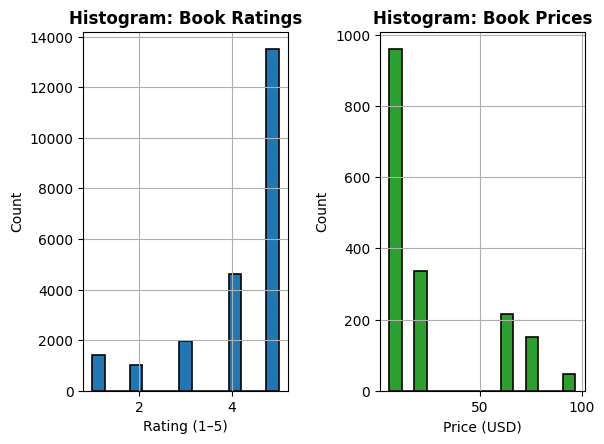

In [15]:
bins = 15
hist_rate = ratings_filtered['rating']
hist_price = ratings_filtered['book_price']





fig, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = True

hist_rate.hist(bins=bins, color='#1f77b4', ax=axes[0], edgecolor='#0d0103', linewidth=1.2)
hist_price.hist(bins=bins, color='#2ca02c', ax=axes[1], edgecolor='#0d0103', linewidth=1.2)

axes[0].set_title('Histogram: Book Ratings', fontsize=12, fontweight='bold')
axes[1].set_title('Histogram: Book Prices', fontsize=12, fontweight='bold')

# x‐ & y‐axis labels
axes[0].set_xlabel('Rating (1–5)')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('Count')

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=1.0)
plt.show()





###Most Purchased Book

In [16]:
most_purchases = ratings_filtered.groupby('book_title')['user_id'].count().sort_values(ascending=False)
print(most_purchases)
# df_temp_rating = most_purchases.to_frame()
# df_temp_rating['most_purchases'] = most_purchases
# df_temp_rating['most_purchases']
df_temp = most_purchases.nlargest(5)
df_temp


book_title
George Orwell 1984                                                                        1464
Great Gatsby (Everyman)                                                                   1455
The great Gatsby (Leading English literature library)                                     1436
Jane Eyre (Simple English)                                                                1190
Dune                                                                                      1127
The Quiet American                                                                         888
Fascinating womanhood                                                                      713
The Secret Garden (Worlds Classics)                                                        693
Without Remorse                                                                            654
The Federalist Papers                                                                      614
Dreamcatcher Movie-Tie In              

,user_id
book_title,
George Orwell 1984,1464
Great Gatsby (Everyman),1455
The great Gatsby (Leading English literature library),1436
Jane Eyre (Simple English),1190
Dune,1127


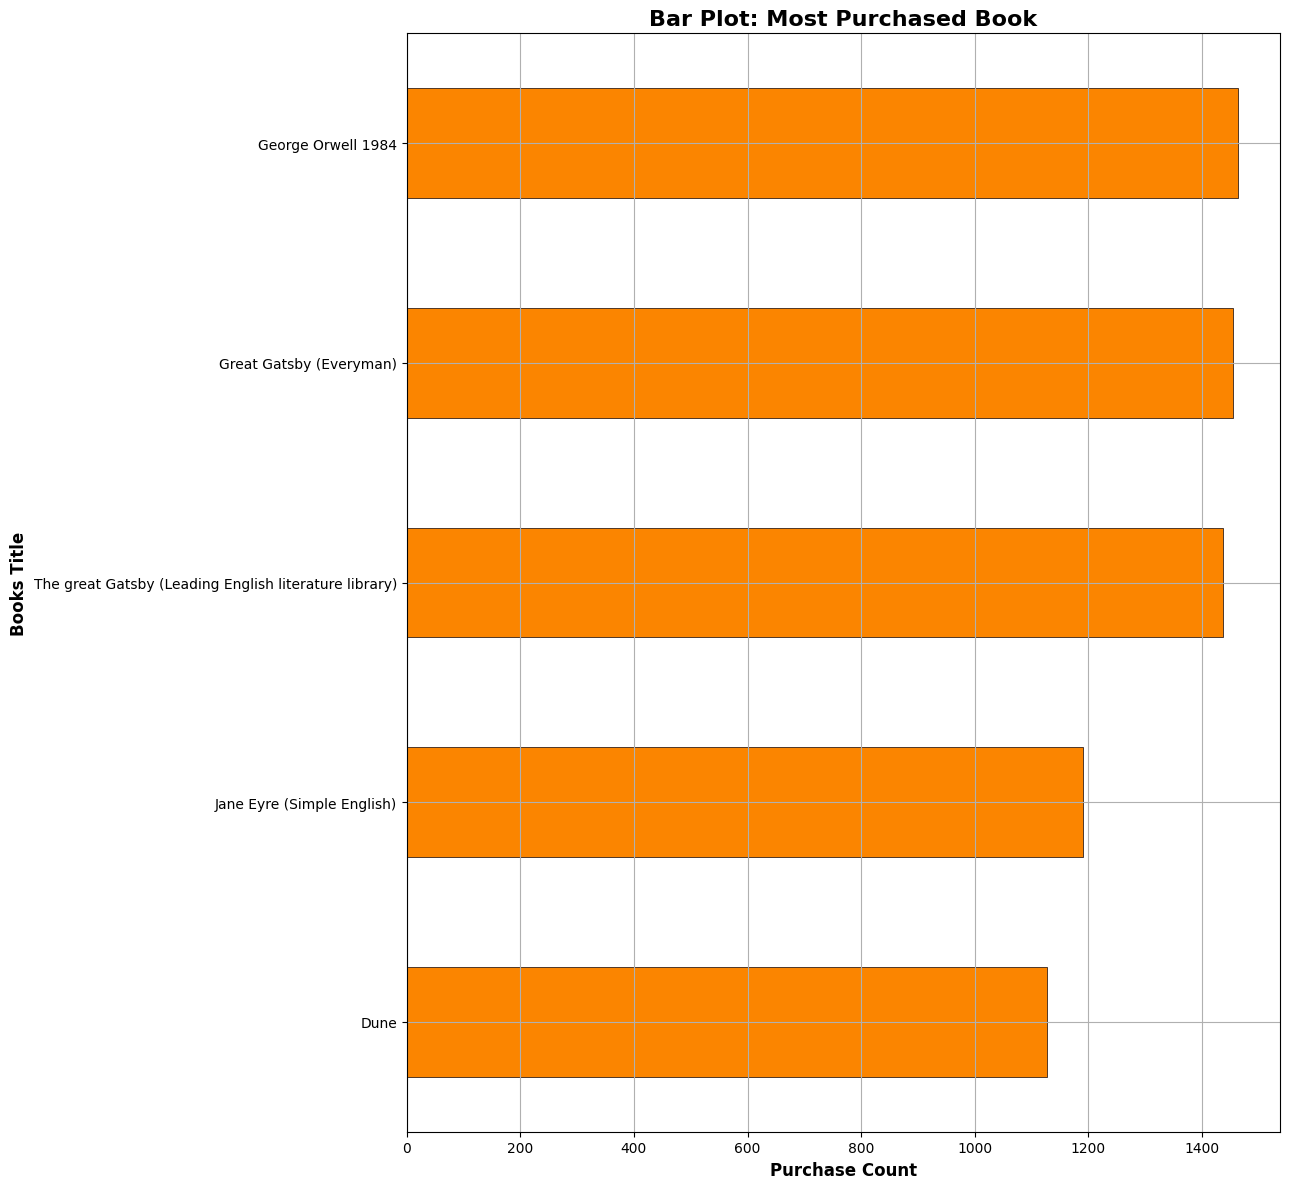

In [17]:
text = "Bar Plot: Most Purchased Book"
x_label = "Purchase Count"
y_label = "Books Title"





df_temp.sort_values().plot(kind='barh', figsize=(13, 12), color='#fb8500', edgecolor='#0d0103', linewidth=0.5)
plt.title(text, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.grid()
plt.show()






### Check outlier for average ratings for books

In [18]:
highest_average_R=ratings_filtered.groupby('book_title')['rating'].mean().sort_values().head(5)


In [19]:

text = "Bar Plot: Highest Average Rated Books"
x_label = "Ratings"
y_label = "Books Title"






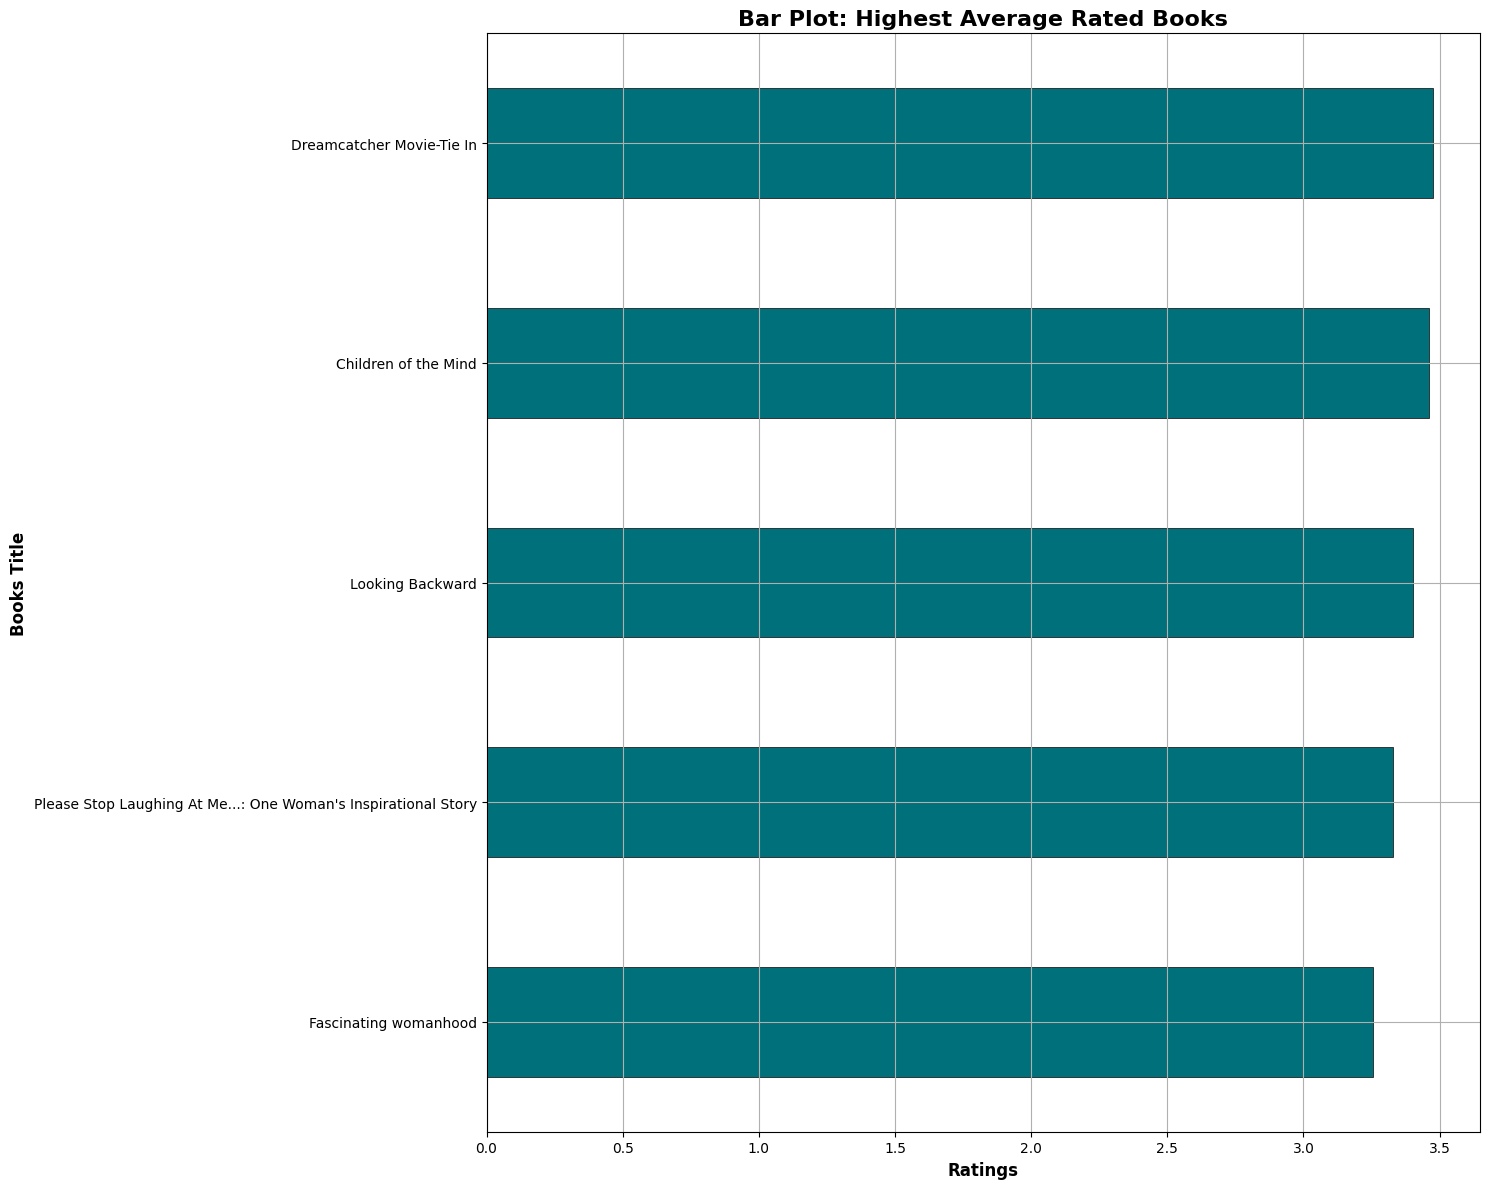

In [20]:
highest_average_R.plot(kind='barh', figsize=(15, 12), color='#00707a', edgecolor='#0d0103', linewidth=0.5)
plt.title(text, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.grid()
plt.show()

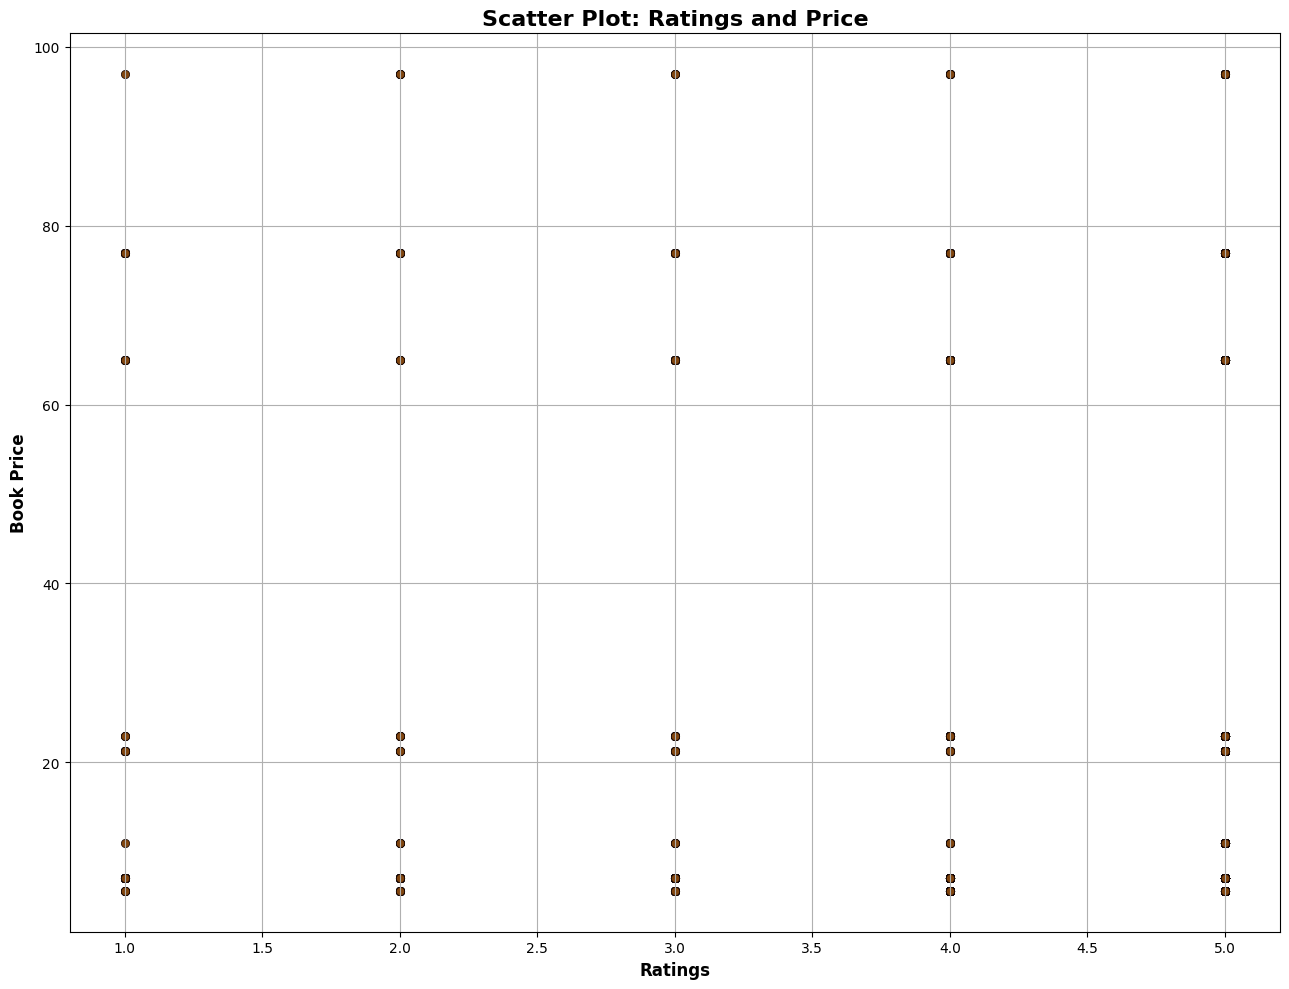

In [21]:
x = ratings_filtered['rating']
y = ratings_filtered['book_price']

text = "Scatter Plot: Ratings and Price"
x_label = 'Ratings'
y_label = 'Book Price'

plt.figure(figsize=(13, 10))

try:
    plt.scatter(x, y, c='#80450e', edgecolor='#0d0103', linewidth=0.5)

except Exception as exc:
    print("! ", exc)

finally:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')
    plt.grid()
    plt.show()




In [22]:
# 1) Compute the rating‐distribution overview
ratings_overview_rating = (
    ratings_filtered['rating']
    .value_counts(normalize=True)   # fraction per rating
    * 100                           # → percentage
)

# 2) Compute the sentiment‐distribution overview
ratings_overview_sentiment = (
    ratings_filtered['sentiment']
    .value_counts(normalize=True)
    * 100
)

# 3) Print them
print("--" * 15)
print("Rating Overview (percent):\n", ratings_overview_rating)
print("--" * 15)
print(" Sentiment Overview (percent):\n", ratings_overview_sentiment)
print("--" * 15)


------------------------------
Rating Overview (percent):
 rating
5.0    60.056884
4.0    20.460404
3.0     8.670340
1.0     6.230557
2.0     4.581815
Name: proportion, dtype: float64
------------------------------
 Sentiment Overview (percent):
 sentiment
1    89.187628
0    10.812372
Name: proportion, dtype: float64
------------------------------


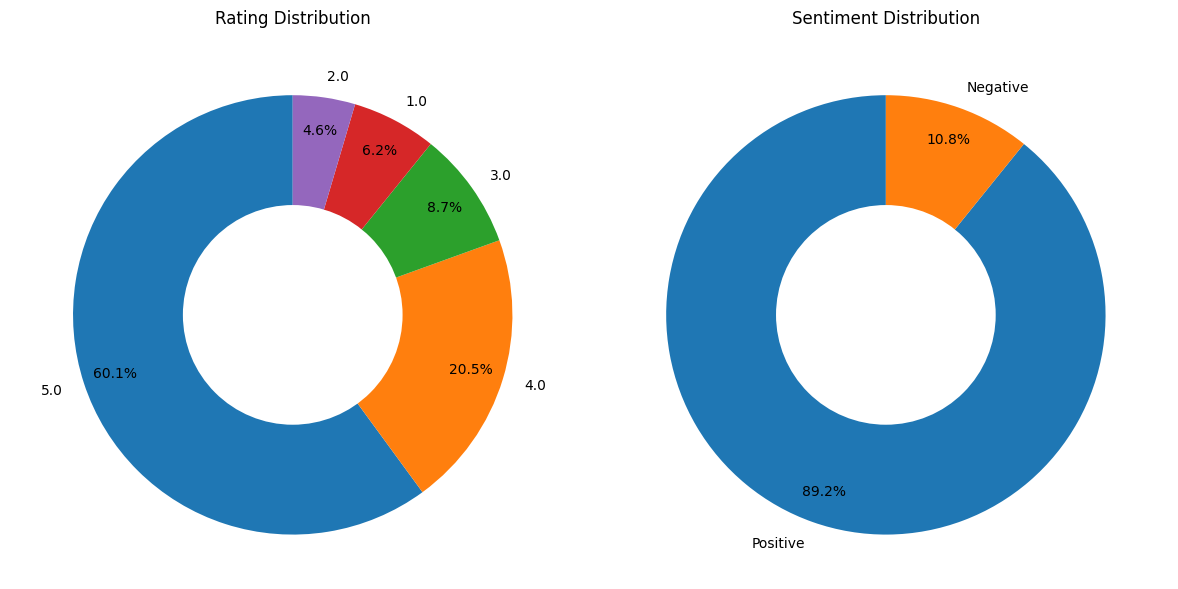

In [23]:
# Prepare sentiment labels
sentiment_labels = ratings_overview_sentiment.index.map({0: 'Negative', 1: 'Positive'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Donut 1: Rating Distribution
wedges1, texts1, autotexts1 = axes[0].pie(
    ratings_overview_rating.values,
    labels=ratings_overview_rating.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)
# Draw center circle
axes[0].add_artist(plt.Circle((0, 0), 0.50, fc='white'))
axes[0].set_title('Rating Distribution',pad=20)
axes[0].axis('equal')

# Donut 2: Sentiment Distribution
wedges2, texts2, autotexts2 = axes[1].pie(
    ratings_overview_sentiment.values,
    labels=sentiment_labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)
axes[1].add_artist(plt.Circle((0, 0), 0.50, fc='white'))
axes[1].set_title('Sentiment Distribution',pad=20)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

###Explore Negative Reviews

In [ ]:
# 2) Normalize the join key
for df in (book_filtered, ratings_filtered):
    df['title_key'] = (
        df['book_title']
          .str.strip()         # remove leading/trailing spaces
          .str.lower()         # lowercase everything
          .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces
    )

# 3) Merge on that key
merged = (
    ratings_filtered
      .merge(
         book_filtered[['title_key','categories']],
         on='title_key',
         how='left'          # keep all reviews, even if some titles don’t match
      )
)

# 4) Quick sanity check
print("Reviews with no category:", merged['categories'].isna().mean()*100, "%")

Reviews with no category: 29.327498376012855 %


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

custom_stops = {
    'also','get','another','example','know','good',
    'people','life','find','want','well','go','great',
    'write','character','novel','man','way','work','come',
    'send','author','thing','world','end','tell','reader','feel','s','live'
    ,'quot','book','read','just','time','like','story','characters',
    'amazon','really','don','ve', 'reading', 'books', 'plot',
    'writing', 'pages', 'interesting'
}



# merge with scikit-learn’s built-in English stops
all_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stops))

# 1. Filter to negative reviews (e.g. rating ≤ 2 or your sentiment flag)
neg_reviews = merged.loc[merged['rating'] <= 2, 'review'].astype(str)

# 2. Vectorize the text
vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    max_df=0.9,    # ignore super-common words
    min_df=10      # only keep words in ≥10 docs
)
X_neg = vectorizer.fit_transform(neg_reviews)

# 3. Fit the LDA model
n_topics = 6
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='batch',
    random_state=42
)


lda.fit(X_neg)

# 4. Helper to print the top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[: -n_top_words - 1 : -1]
        top_terms = [feature_names[i] for i in top_indices]
        print(f"Topic {topic_idx}: {', '.join(top_terms)}")

print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words=10)

# 5. (Optional) Assign each review its dominant topic
doc_topic_dists = lda.transform(X_neg)                      # shape = (n_docs, n_topics)
dominant_topics = doc_topic_dists.argmax(axis=1)           # gives topic index per review
neg_df = merged.loc[merged['rating'] <= 2].copy().reset_index(drop=True)
neg_df['dominant_topic'] = dominant_topics


Topic 0: make, love, boring, written, think, better, classic, did, person, dune
Topic 1: edition, kindle, version, text, original, buy, page, copy, missing, publisher
Topic 2: gatsby, fitzgerald, nemo, nick, daisy, captain, love, verne, narrator, say
Topic 3: king, think, better, money, bad, make, written, word, cd, did
Topic 4: women, husband, woman, men, wife, love, did, make, god, marriage
Topic 5: did, didn, think, little, boring, written, say, long, got, does


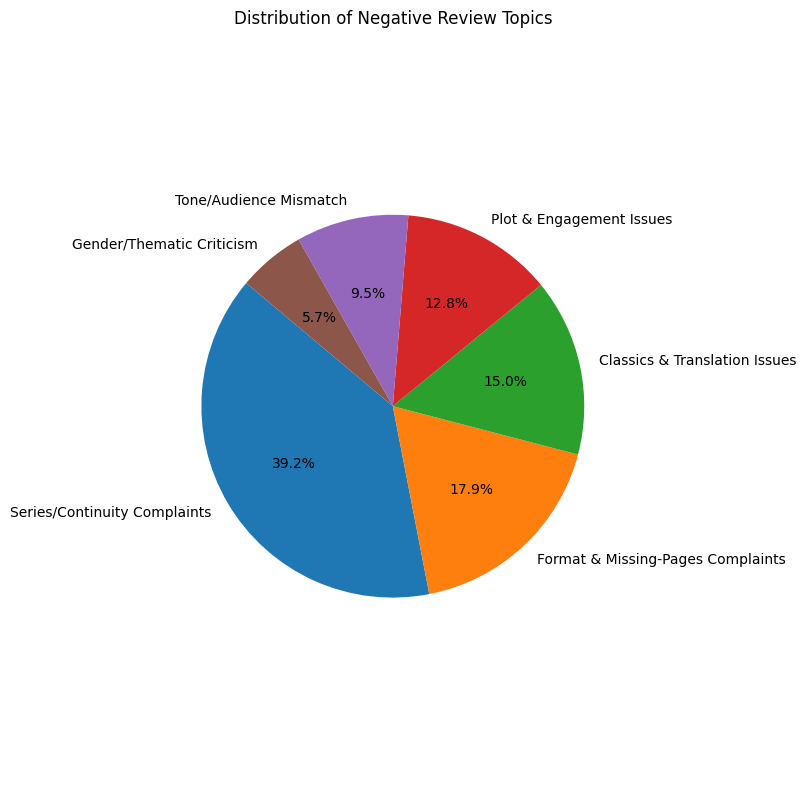

In [ ]:
topic_labels = {
    0: "Classics & Translation Issues",
    1: "Format & Missing-Pages Complaints",
    2: "Gender/Thematic Criticism",
    3: "Plot & Engagement Issues",
    4: "Tone/Audience Mismatch",
    5: "Series/Continuity Complaints"
}

# 2. Ensure neg_df has the numeric topic column
# (skip or adjust if yours is named differently)
assert 'dominant_topic' in neg_df.columns, "dominant_topic missing!"

# 3. Map to create topic_label
neg_df['topic_label'] = neg_df['dominant_topic'].map(topic_labels)

# Compute the percentage distribution of negative topics
topic_dist = (neg_df['topic_label']
              .value_counts(normalize=True)
              .mul(100)
              .round(1))

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(topic_dist, labels=topic_dist.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Distribution of Negative Review Topics')
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()